<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/EDOs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos Numéricos para a solução de EDOs

Nesta unidade, vamos estudar os método de passo único, explícitos e implícitos para aproximar a solução de Equações Diferenciais Ordinárias (EDOs). Além disso, também estudaremos a aplicação destes métodos para a solução de um sistema de EDOs.

O Problema de Valor Inicial é dado por,

$$\begin{array}{ll}
\dfrac{dy}{dt} = f(t,y), & t\in [t_0,t_F]\\ \\
y(t_0) = y_0, & \\
\end{array}$$
ond $f(t,y)$ é uma função contínua, dada pelo problema e $y_0$ é a condição inicial.

**Método de Euler**

Deduzido a partir da expansão da solução em Série de Taylor:

$$y(t+\Delta t) = y(t)+\Delta t y'(t) + \Delta t^2 y''(t) + O(\Delta t^3)$$

Assim, após discretizar o intervalo, temos $\Delta t= (t_F-t_0)/N$ e $t_i=t_0+i\Delta t$, com $i=0,1,\ldots, N$ e  $N$ o número de subintervalos de $[t_0,t_F]$. Portanto, a aproximação da solução em $y(t_i)$, pelo **Método de Euler Explícito**, é dada por

$$y_{i+1} = y_i + \Delta t f(t_i, y_i).$$

Já a aproximação da solução em $y(t_i)$, pelo **Método de Euler Implícito**, é dada por

$$y_{i+1} = y_i + \Delta t f(t_{i+1}, y_{i+1}).$$

**Exercícios**

Implemente o método de Euler Implícito e Explícito para os seguintes PVIs:

1. $\dfrac{dy}{dt}=-ty, t\in [0,1], y(0)=1$. Solução exata: $y(t) = e^{(-t^2)/2}$

2. $y'=yx^2-y, x\in[0,2], y(0)=1$. Solução exata: $y(x)=exp(-x+x^3/3)$

3. $$\begin{array}{lll}
\dfrac{dx}{dt} = -y(t),& x(0) = 0, & t\in[0,1]\\ \\
\dfrac{dy}{dt} = x(t),& y(0)=1&\\
\end{array}$$

In [ ]:
#Exercício 1
import numpy as np

def y_exata(t):
    return np.exp(-t*t/2)

def f(t, y):
    fe = -t*y
    return fe

a = 0
b = 1
N = 32

h = (b - a)/N
y0 = 1
t = a

print("Método de Euler Explícito\n")
for i in range(N):
    y = y0 + h*f(t,y0)
    t = t + h
    print('y_aprox = ', y, 'erro = ', abs(y - y_exata(t)))
    y0 = y

y0 = 1
t = a
print("\nMétodo de Euler Implícito\n")
for i in range(N):
    y = y0/(1 + h*(t + h))
    t = t + h
    print('y_aprox = ', y, 'erro = ', abs(y - y_exata(t)))
    y0 = y

y0 = 1
t = a
print("\nMétodo do Trapézio\n")
for i in range(N):
    y = (y0 - (h/2)*(t*y0))/(1 + (h/2)*(t + h))
    t = t + h
    print('y_aprox = ', y, 'erro = ', abs(y - y_exata(t)))
    y0 = y


Método de Euler Explícito para um sistema de 2 EDOs



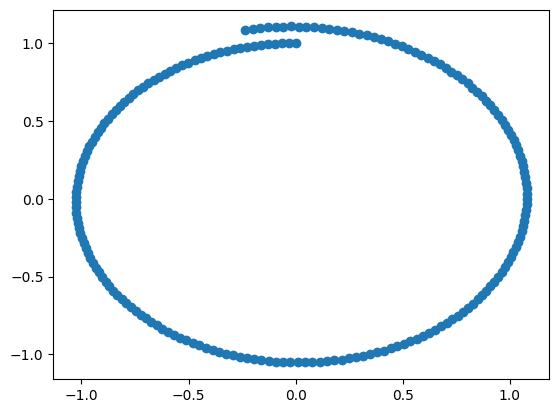

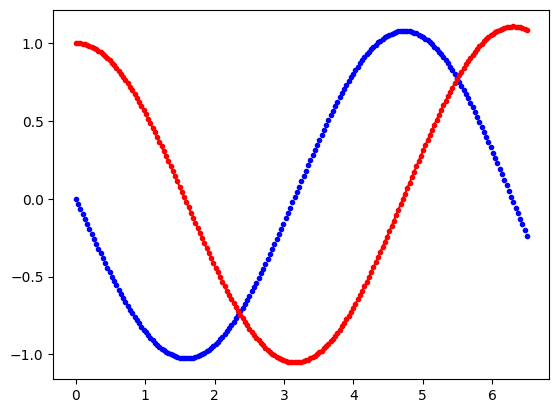

In [ ]:
#Exercício 3
import matplotlib.pyplot as plt
import numpy as np

def f(t,x,y):
    return -y

def g(t,x,y):
    return x

a = 0
b = 6.5
N = 200
t = np.zeros(N+1)
h = (b - a)/N
x0 = 0
y0 = 1
x = np.zeros(N+1)
y = np.zeros(N+1)
x[0] = x0
y[0] = y0
t[0] = a

print("Método de Euler Explícito para um sistema de 2 EDOs\n")
for i in range(N):
    x[i+1] = x[i] + h*f(t[i],x[i],y[i])
    y[i+1] = y[i] + h*g(t[i],x[i],y[i])
    t[i+1] = t[i] + h
    #print('x_ap = ', x[i+1], 'y_ap = ', y[i+1])

plt.figure(1)
plt.plot(x, y, 'o')
plt.show()

plt.figure(2)
plt.plot(t, x, 'b.')
plt.plot(t, y, 'r.-')
plt.show()

**Métodos de Runge-Kutta**

Os métodos de Runge-Kutta são métodos de passo único e de alta ordem (erro local de truncamento) baseados em Série de Taylor. De forma geral,

$$\begin{array}{l}
y_0=y(t_0), \\
y_{k+1}= y_k + \Delta t \phi(\Delta t, t, y) \\
\end{array}$$



*   Runge-Kutta ordem 2:

**Ponto Médio**
$$\left\{\begin{array}{l}
y_0=y(t_0), \\
y_{k+1}= y_k + \Delta t f\left(t_k+\dfrac{\Delta t}{2}, y_k+\dfrac{\Delta t}{2}f(t_k,y_k)\right) \\
\end{array}\right .$$

**Euler Aprimorado**
$$\left\{\begin{array}{l}
y_0=y(t_0), \\
y_{k+1}= y_k + \Delta t \left(\dfrac{k_1+k_2}{2}\right) \\
\end{array}\right .$$
com $\displaystyle{k_1=f(t_k,y_k)}$ e $\displaystyle{k_2=f(t_k+\Delta t, y_k+\Delta t k_1)}$.

*   **Runge-Kutta ordem 3:**

$$\left\{\begin{array}{l}
y_0=y(t_0), \\
y_{k+1}= y_k + \Delta t \left(\dfrac{k_1+4k_2+k_3}{6}\right) \\
\end{array}\right .$$
com $\displaystyle{k_1=f(t_k,y_k)}$, $\displaystyle{k_2=f\left(t_k+\dfrac{\Delta t}{2}, y_k+\dfrac{\Delta t}{2} k_1\right)}$ e $\displaystyle{k_3=f\left(t_k+\Delta t, y_k-\Delta t k_1+2\Delta tk_2\right)}$.

*   **Runge-Kutta ordem 4:**


$$\left\{\begin{array}{l}
y_0=y(t_0), \\
y_{k+1}= y_k + \Delta t \left(\dfrac{k_1+2k_2+2k_3+k_4}{6}\right)\\
\end{array}\right .$$
com $\displaystyle{k_1=f(t_k,y_k)}$, $\displaystyle{k_2=f\left(t_k+\dfrac{\Delta t}{2}, y_k+\dfrac{\Delta t}{2} k_1\right)}$ e $\displaystyle{k_3=f\left(t_k+\dfrac{\Delta t}{2}, y_k+\dfrac{\Delta t}{2}k_2\right)}$ e $\displaystyle{k_4=f\left(t_k+\Delta t, y_k+\Delta tk_3\right)}$.



In [ ]:
def f(x,y):
  return (1/(1+x**2) - 2*y**2)

def sol(x):
  return x/(1+x**2)


a = 0
b = 1
N = 128
h = (b - a)/N
x0 = a
y0 = 0

print('Euler Aprimorado')
for i in range(N):
  k1 = f(x0, y0)
  k2 = f(x0 + h, y0 + h*k1)
  y = y0 + (h/2)*(k1 + k2)
  y0 = y
  x0 = x0 + h
print(x0, sol(x0), y, abs(y - sol(x0)))

x0 = a
y0 = 0
print('Euler RK4')
for i in range(N):
  k1 = f(x0, y0)
  k2 = f(x0 + h/2, y0 + (h/2)*k1)
  k3 = f(x0 + h/2, y0 + (h/2)*k2)
  k4 = f(x0 + h, y0 + h*k3)
  y = y0 + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
  y0 = y
  x0 = x0 + h
print(x0, sol(x0), y, abs(y - sol(x0)))

Euler Aprimorado
1.0 0.5 0.4999900945625699 9.905437430124397e-06
Euler RK4
1.0 0.5 0.49999999986100024 1.389997561496159e-10


In [ ]:
#Análise do erro RK2
print(0.015154725800572644/0.0030517319293646428)
print(0.0030517319293646428/0.0006896589091499594)
print(0.0006896589091499594/0.00016423701931311818)
print(0.00016423701931311818/4.00922172104079e-05)



4.965942668407245
4.424987321813998
4.199168445910014
4.096481330807577


In [ ]:
#Análise do erro RK4
print(0.00019839775439817187/1.0545010608931094e-05)
print(1.0545010608931094e-05/6.091651165718304e-07)
print(6.091651165718304e-07/3.662449593599959e-08)
print(3.662449593599959e-08/2.2454094139590097e-09)
print(2.2454094139590097e-09/1.389997561496159e-10)

18.81437219514402
17.31059498001913
16.63272356393195
16.31083209517005
16.154052900223125
